The following notebook describes the data analysis for coincident events. Determining the string and location of detectors where the coincident events occur in. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#importing all data 
RUN1 = pd.read_excel('RUN1.xlsx')
RUN2 = pd.read_excel('RUN_2.xlsx')
RUN3 = pd.read_excel('RUN_3.xlsx')
RUN4 = pd.read_excel('RUN_4.xlsx')
RUN5 = pd.read_excel('RUN_5.xlsx')
RUN6 = pd.read_excel('Run_6.xlsx')
RUN7 = pd.read_excel('RUN_7.xlsx')
RUN8 = pd.read_excel('RUN_8.xlsx')
RUN9 = pd.read_excel('RUN9.xlsx')
RUN10 = pd.read_excel('RUN_10.xlsx')
RUN11 = pd.read_excel('RUN_11.xlsx')
RUN12 = pd.read_excel('RUN_12.xlsx')


# combining all data frames
result_df = pd.concat([RUN1,RUN2,RUN3,RUN4,RUN5,RUN6,RUN7,RUN8,RUN9,RUN10,RUN11,RUN12],ignore_index=True)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [51]:
result_df['Position Difference'] = result_df.groupby('Event')['Position'].diff() #grouping all events by position 
result_df['Position Difference1'] = result_df.groupby('Event')['String'].diff() #grouping all events by string 

#remove all nan values 
#result_df = result_df.dropna(subset=['Position Difference', 'Position Difference1'])

# Print the DataFrame after removing rows with NaN values
#print(result_df)

#printing the unique events and the detectors in which they occur 
all_events =[]
no_detectors =[]
idea = 0
for i in result_df['Event'].unique():
    detectors = result_df.loc[result_df['Event'] == i, 'Detector name'].unique()
    all_events.append(i)
    no_detectors.append(len(detectors))
    idea = idea + len(detectors)
    print(f"For event {i} the detectors are {detectors} which is {len(detectors)}")


For event 494 the detectors are ['ch1080000' 'ch1080001'] which is 2
For event 501 the detectors are ['ch1080000' 'ch1120000' 'ch1120001'] which is 3
For event 1097 the detectors are ['ch1080000' 'ch1080001'] which is 2
For event 1303 the detectors are ['ch1080000' 'ch1080001' 'ch1118402' 'ch1118403'] which is 4
For event 554 the detectors are ['ch1080005' 'ch1081601' 'ch1078400' 'ch1121605'] which is 4
For event 474 the detectors are ['ch1081603' 'ch1081604' 'ch1083202' 'ch1083204' 'ch1083205' 'ch1084800'
 'ch1084801' 'ch1084802' 'ch1084803' 'ch1084805' 'ch1086400' 'ch1086401'
 'ch1116805' 'ch1120000' 'ch1120001'] which is 15
For event 506 the detectors are ['ch1083202' 'ch1083205'] which is 2
For event 1160 the detectors are ['ch1083202' 'ch1083203'] which is 2
For event 1402 the detectors are ['ch1083202' 'ch1083203' 'ch1110402' 'ch1110403'] which is 4
For event 32 the detectors are ['ch1083203' 'ch1116801' 'ch1083204' 'ch1083205' 'ch1084800' 'ch1120000'
 'ch1120001'] which is 7
For

In [3]:
grouped = result_df.groupby('Event') #group by event index

df_unique_events = pd.DataFrame(columns=result_df.columns) #events on the same string 
df_removed_events = pd.DataFrame(columns=result_df.columns) #events on different strings


for name, group in grouped:
    # Check if all string values in the group are the same
    if group['String'].nunique() == 1:
        # If yes, add to df_unique_events
        df_unique_events = pd.concat([df_unique_events, group])
    else:
        # If no, add to df_removed_events
        df_removed_events = pd.concat([df_removed_events, group])

uc = df_unique_events['Event'].nunique()
uc1 = df_removed_events['Event'].nunique()


389
165
554
70.21660649819495
29.783393501805055


In [5]:
#remove the nan values 
nan_count = df_unique_events['Position Difference'].isna().sum()
nan_count1 = df_removed_events['Position Difference'].isna().sum()

print(nan_count) #number of starter detectors 
print(nan_count1) #number of starter detectors 

1608
836
772
389
165


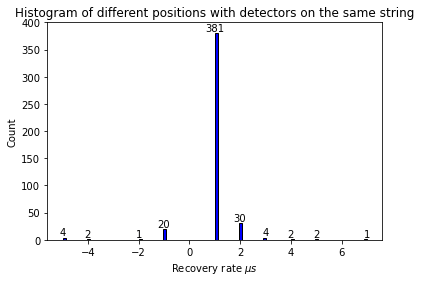

In [6]:
selected_column = 'Position Difference' 

plt.hist(df_unique_events[selected_column], bins=100, color='blue', edgecolor='black')
plt.xlabel('Recovery rate $\mu s$')
plt.ylabel('Count')
plt.title('Histogram of different positions with detectors on the same string')

for value in df_unique_events[selected_column].unique():
    count = len(df_unique_events[df_unique_events[selected_column] == value])
    if np.isfinite(value) and np.isfinite(count):
        plt.text(value, count, str(count), rotation=0, ha='center', va='bottom')


plt.show()

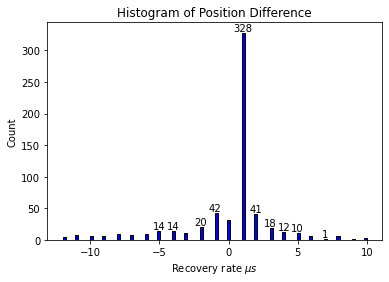

In [7]:

selected_column = 'Position Difference' 

plt.hist(df_removed_events[selected_column], bins=100, color='blue', edgecolor='black')


plt.xlabel('Recovery rate $\mu s$')
plt.ylabel('Count')
plt.title('Histogram of ' + selected_column)

for value in df_unique_events[selected_column].unique():
    count = len(df_removed_events[df_removed_events[selected_column] == value])
    if np.isfinite(value) and np.isfinite(count):
        plt.text(value, count, str(count), rotation=0, ha='center', va='bottom')

    
plt.show()